# This jupyter notebook is a simple practice of python for linear regression.

## This practice uses a dataset with company costs (research and development, management, and marketing) and profits.

This practice uses a dataset with company costs (research and development, management, and marketing) and profits.

The practice starts with verifying the correlation between the independent and dependent variables. Next, the data is split into training and testing sets and adequately scaled. A linear regression model is trained with all independent variables in the sequence. This way, it is possible to verify which independent variables are statistically significant (p-value < 0.05) to the model. Some residual analyses are performed, and then a second model with only the statistically significant independent variables is created and trained. Some performance metrics are calculated, and a comparative graph with the real and estimated profit values is generated.

The python packages used in this practice.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline

The dataset used in this practive (it is available for downloading).

In [2]:
df = pd.read_excel (r'CompanyPractice.xlsx')
df.head()

,RDCosts,ManCosts,MarketingCosts,Profits
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Some statistics generated by Pandas.

In [3]:
df.describe()

,RDCosts,ManCosts,MarketingCosts,Profits
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Here is the correlation table generated by Pandas and, its heatmap generated by seaborn.

In [4]:
df.corr()

,RDCosts,ManCosts,MarketingCosts,Profits
RDCosts,1.000000,0.241955,0.724248,0.972900
ManCosts,0.241955,1.000000,-0.032154,0.200717
MarketingCosts,0.724248,-0.032154,1.000000,0.747766
Profits,0.972900,0.200717,0.747766,1.000000


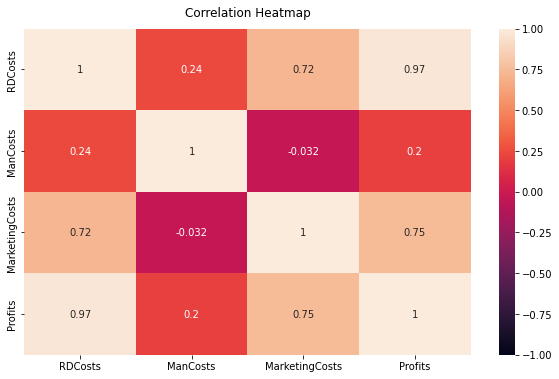

In [5]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

The data has to be split into training and testing sets. Let's do that with scikit-learn.

In [6]:
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 40
No. of testing examples: 10


The data was scaled with scikit-learn pre-processing tool.

In [7]:
trans = StandardScaler()
# convert the array back to a dataframe

ddd = trans.fit_transform(training_data[["RDCosts", "ManCosts", "MarketingCosts"]])

scaled_training_data = pd.DataFrame(trans.fit_transform(training_data[["RDCosts", "ManCosts", "MarketingCosts"]]), \
                                                                                                    index=training_data.index)

scaled_training_data.rename(columns={0: 'RDCosts', 1: 'ManCosts', 2:'MarketingCosts'}, inplace=True)

scaled_training_data = pd.concat([scaled_training_data, training_data['Profits']], axis=1)

scaled_training_data.head()


,RDCosts,ManCosts,MarketingCosts,Profits
48,-1.749011,-2.453633,-1.641686,35673.41
40,-1.116431,-0.073715,-0.294574,78239.91
2,1.679322,-0.693624,1.538564,191050.39
27,-0.144358,0.258266,1.111728,105008.31
11,0.496116,-1.026903,0.305318,144259.40


Let's create the first linear regression model version with statsmodels.
Based on the regression results is possible to verify that only the independent variable RDCosts (research and development costs) is statistically significant (P>|t| < 0.05). So let's remove the other independent variables for a second model version.

In [8]:
# Fit regression model
model_v1 = smf.ols(formula = 'Profits ~ RDCosts + ManCosts + MarketingCosts', data=scaled_training_data).fit()

# Inspect the results
print(model_v1.summary())

                            OLS Regression Results                            
Dep. Variable:                Profits   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     273.6
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           8.00e-25
Time:                        19:54:42   Log-Likelihood:                -418.25
No. Observations:                  40   AIC:                             844.5
Df Residuals:                      36   BIC:                             851.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.157e+05   1402.010     82.

Some residual analysis for the first model version. 
The quantile-quantile (q-q) plot graph shows that the theoretical and sample populations have a common distribution.
The 45-degree reference line is also plotted. 
The two sets come from a population with the same distribution because the points fall approximately along this reference line.

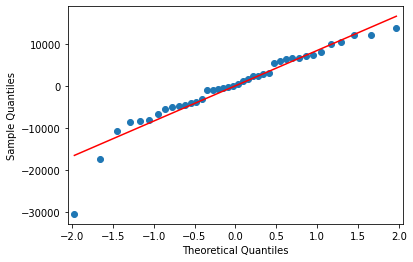

In [9]:
sm.qqplot(model_v1.resid, line='s')
py.show()

The residuals have a normal distribution as expected.

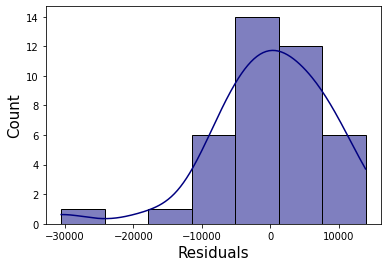

In [10]:
sns.histplot(model_v1.resid, color = 'navy', kde = True)
plt.xlabel("Residuals", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

The pandas dataframe is sliced to generate the data for a second model with only the statistically significant independent variable.

In [11]:
costs_scaled_training_data = pd.DataFrame(scaled_training_data[["RDCosts"]])

costs_scaled_training_data.rename(columns={0: 'RDCosts'}, inplace=True)

costs_scaled_training_data = pd.concat([costs_scaled_training_data, training_data['Profits']], axis=1)

costs_scaled_training_data.head()

,RDCosts,Profits
48,-1.749011,35673.41
40,-1.116431,78239.91
2,1.679322,191050.39
27,-0.144358,105008.31
11,0.496116,144259.40


In [12]:
# Fit regression model

model_v2 = smf.ols(formula = 'Profits ~ RDCosts', data=costs_scaled_training_data).fit()

# Inspect the results
print(model_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                Profits   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     792.6
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           4.64e-27
Time:                        19:54:48   Log-Likelihood:                -419.95
No. Observations:                  40   AIC:                             843.9
Df Residuals:                      38   BIC:                             847.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.157e+05   1423.868     81.284      0.0

The quantile-quantile (q-q) plot graph shows that the theoretical and sample populations have a common distribution also.

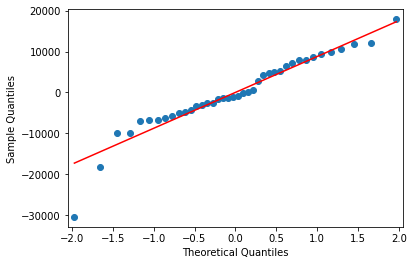

In [13]:
sm.qqplot(model_v2.resid, line='s')
py.show()

The residuals still have a normal distribution.

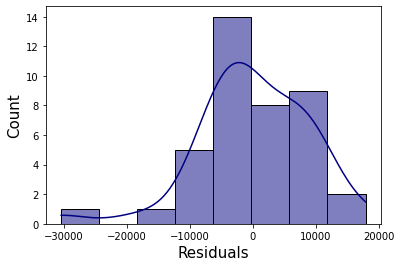

In [14]:
sns.histplot(model_v2.resid, color = 'navy', kde = True)
plt.xlabel("Residuals", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [15]:
scaled_testing_data = pd.DataFrame(trans.fit_transform(testing_data[["RDCosts"]]), index=testing_data.index)

scaled_testing_data.rename(columns={0: 'RDCosts'}, inplace=True)

scaled_testing_data = pd.concat([scaled_testing_data, testing_data['Profits']], axis=1)

scaled_testing_data.head()

,RDCosts,Profits
36,-0.590578,90708.19
46,-1.217541,49490.75
7,1.739402,155752.60
41,-0.608250,77798.83
17,0.922328,125370.37


The second model version is used to perform predictions with the testing independent variable as input.

In [16]:
results = model_v2.predict(pd.DataFrame(scaled_testing_data[['RDCosts']]))

results

36     92063.383685
46     66931.129998
7     185462.270277
41     91355.005232
17    152709.305753
14    175946.442150
34    108386.404896
33    116719.510083
45     66641.443241
39    101156.357185
dtype: float64

The independent variable, the profits, and the model estimated profits are combined in a data frame.

In [17]:
inversedTesting = pd.DataFrame(trans.inverse_transform(scaled_testing_data[["RDCosts"]]), index=scaled_testing_data.index)

inversedTesting.rename(columns={0:'RDCosts'}, inplace=True)

inversedTesting = pd.concat([inversedTesting, scaled_testing_data[['Profits']], pd.DataFrame(results)], axis=1)

inversedTesting.rename(columns={0: 'ModelResults'}, inplace=True)

inversedTesting

,RDCosts,Profits,ModelResults
36,28663.76,90708.19,92063.383685
46,1315.46,49490.75,66931.129998
7,130298.13,155752.60,185462.270277
41,27892.92,77798.83,91355.005232
17,94657.16,125370.37,152709.305753
14,119943.24,132602.65,175946.442150
34,46426.07,96712.80,108386.404896
33,55493.95,96778.92,116719.510083
45,1000.23,64926.08,66641.443241
39,38558.51,81005.76,101156.357185


Two performance metrics are calculated with the scikit-learn package.

In [18]:
#from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(inversedTesting['ModelResults'], inversedTesting['Profits'], squared=False)

print("The value of the MSE is:{:10.2f}".format(rmse))

The value of the MSE is:  22229.32


In [19]:
mbe = mean_absolute_error(inversedTesting['ModelResults'], inversedTesting['Profits'])  

print("The value of the MAE is:{:10.2f}".format(mbe))

The value of the MAE is:  18622.43


A proper data frame with the initial data and the linear regression predictions are combined to generate a scatterplot with seaborn.

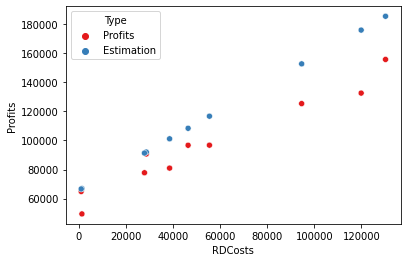

In [20]:
graphProfits = pd.DataFrame(np.repeat('Profits', results.size), index=scaled_testing_data.index)

grahpData = pd.DataFrame(trans.inverse_transform(scaled_testing_data[["RDCosts"]]), index=scaled_testing_data.index)

grahpData.rename(columns={0:'RDCosts'}, inplace=True)

grahpData = pd.concat([grahpData, scaled_testing_data[['Profits']], graphProfits], axis=1)

grahpData.rename(columns={0:'Type'}, inplace=True)

graphEstimation = graphProfits = pd.DataFrame(np.repeat('Estimation', results.size), index=scaled_testing_data.index)

grahpData1 = pd.DataFrame(trans.inverse_transform(scaled_testing_data[["RDCosts"]]), index=scaled_testing_data.index)

grahpData1.rename(columns={0:'RDCosts'}, inplace=True)

grahpData1 = pd.concat([grahpData1, pd.DataFrame(results)], axis=1)

grahpData1.rename(columns={0:'Profits'}, inplace=True)

grahpData1 = pd.concat([grahpData1, graphEstimation], axis=1)

grahpData1.rename(columns={0:'Type'}, inplace=True)

finalGraphData = pd.concat([grahpData, grahpData1], axis=0)

finalGraphData = finalGraphData.reset_index(drop=True)

sns.scatterplot(x="RDCosts", y="Profits", hue="Type", data=finalGraphData, markers=["x", "o"], palette="Set1");

It is possible to verify that the linear regression model can reproduce the profits increasing tendency with the increasing investment in research and development. However, it is indicated to use other machine learning models to minimize the obtained metrics.